# Intelligence Artificielle - Deep Learning
## Réseaux de neurones (I)

# Prétraitement des données 

In [0]:
import numpy as np

#In this first part, we just prepare our data (mnist) 
#for training and testing

import keras
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).T
X_test = X_test.reshape(X_test.shape[0], num_pixels).T
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
X_train  = X_train / 255
X_test  = X_test / 255

In [0]:
#We want to have a binary classification: digit 5 is classified 1 and 
#all the other digits are classified 0

y_new = np.zeros(y_train.shape)
y_new[np.where(y_train==5.0)[0]] = 1
y_train = y_new

y_new = np.zeros(y_test.shape)
y_new[np.where(y_test==5.0)[0]] = 1
y_test = y_new


y_train = y_train.T
y_test = y_test.T


m = X_train.shape[1] #number of examples

#Now, we shuffle the training set
np.random.seed(138)
shuffle_index = np.random.permutation(m)
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index]

y[1]=[0.]


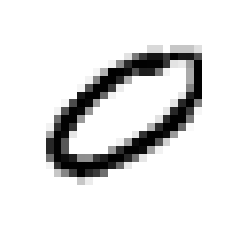

In [28]:
#Display one image and corresponding label 
import matplotlib
import matplotlib.pyplot as plt
i = 1
print('y[{}]={}'.format(i, y_train[:,i]))
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()

y[6]=[1.]


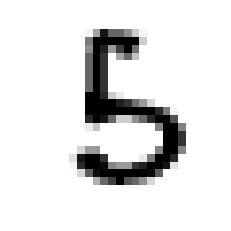

In [29]:
#Another image:
i = 6
print('y[{}]={}'.format(i, y_train[:,i]))
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()

# Exercice 1. Un réseau à un seul neurone 

1. Compléter le fichier en définissant la fonction sigmoid.


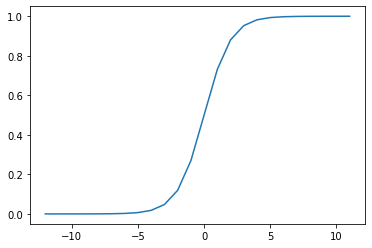

In [30]:
def sigmoid(z):
    s = 1. / (1. + np.exp(-z))
    return s

#Visualize sigmoid
x = np.arange(-12.0, 12.0, 1.0, dtype=np.float32)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

2. Donner les expressions mathématiques de la sortie y du neurone en fonction de x, W, b et .


$$
\hat y = \sigma(z) = \sigma\left(\sum_{i=1}^{784}w_i*x_i +b\right)
$$

3. Donner l’expression mathématique de le fonction de perte L . Utiliser pour cela la cross entropy. Ecrivez la définition Python de cette fonction.


$$
L(y,\hat y) = -\left( y\ln(\hat y) + (1-y)\ln(1-\hat y)\right)
$$

In [0]:
def compute_loss(Y, Y_hat):
    m = Y.shape[1]
    L = -(1./m) * (np.sum(np.multiply(np.log(Y_hat),Y)) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y))))
    return L

Pour réaliser la rétro-propagation, nous aurons besoin de connaitre les changement de la fonction de perte en fonction des changements de chaque paramètre w de W et du biais b.


1. Ecrire l’expression de la dérivée de L en par rapport à chaque paramètre w.


Chain rule:

\begin{eqnarray}
\frac{\partial L}{\partial w} = \frac{\partial L}{\partial \hat y} \times \frac{\partial \hat y}{\partial z} \times \frac{\partial z}{\partial w}
\end{eqnarray}

Or :
\begin{eqnarray}
\frac{\partial L}{\partial \hat y} & = & -\frac y {\hat y} + \frac{1-y}{1-\hat y} = \frac{\hat y -y}{\hat y (1-\hat y)}
\end{eqnarray}

\begin{eqnarray}
\frac{\partial \hat y}{\partial z} & = & \frac{\partial \sigma}{\partial z} = \sigma(z) (1-\sigma(z)) = \hat y (1-\hat y)
\end{eqnarray}

\begin{eqnarray}
\frac{\partial z}{\partial w} & = & \frac{\partial z}{\partial w}\left(\sum wx + b\right) = x
\end{eqnarray}

Mettons tout ensemble :

\begin{eqnarray}
\frac{\partial L}{\partial w_k} = (\hat y - y)x_k \text{ et } \frac{\partial L}{\partial b} = (\hat y - y).
\end{eqnarray}



2. Compléter le fichier pour implémenter tous les éléments nécessaires à l’entrainement de votre
modèle.


3. Entrainer et tester le modéle.

In [32]:
#We define the backward propagation, build and train our network:
learning_rate = 1.
X = X_train
Y = y_train
print('Y.shape={}'.format(Y.shape))
n_x = X.shape[0]
m = X.shape[1]
W = np.random.randn(1, n_x) * 0.01
b = np.zeros((1, 1))

for i in range(100):
    Z = np.matmul(W, X) + b
    Y_hat = sigmoid(Z)
    cost = compute_loss(Y, Y_hat)

    #print('Y_hat-Y.shape={}'.format((Y_hat-Y).shape))
    #print('X.T.shape={}'.format((X.T).shape))

    dW = (1./m) * np.matmul((Y_hat-Y), X.T)
    db = (1./m) * np.sum(Y_hat-Y, axis=1, keepdims=True)

    W = W - learning_rate * dW
    b = b - learning_rate * db

    if (i % 20 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)
 

Y.shape=(1, 60000)
Epoch 0 cost:  0.6817831288870175
Epoch 20 cost:  0.15693060630580027
Epoch 40 cost:  0.1269609305022656
Epoch 60 cost:  0.11949298198327493
Epoch 80 cost:  0.11494037451099734
Final cost: 0.11191596629329834
